In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import csv files
city_data = pd.read_csv('city_data.csv')
ride_data = pd.read_csv('ride_data.csv')

In [4]:
#display city data & ride data
print(city_data.head())
print(ride_data.head())

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


In [5]:
#merge data
merged_data = pd.merge(city_data, ride_data, on='city', how='outer')
merged_data.head()

city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850

In [64]:
#breakout by type
#rural
raw_rural = merged_data.loc[merged_data['type'] == 'Rural']

#suburban
raw_suburban = merged_data.loc[merged_data['type'] == 'Suburban']

#urban
raw_urban = merged_data.loc[merged_data['type'] == 'Urban']

In [55]:
#avg fare per city
avg_fare_city = merged_data.groupby('city').mean()
avg_fare_city = avg_fare_city['fare']
avg_fare_city.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [56]:
#avg fare per type
avg_fare_type = merged_data.groupby('type').mean()
avg_fare_type = avg_fare_type['fare']
avg_fare_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [57]:
#total rides per city
rides_city = merged_data.groupby('city').count()
rides_city = rides_city['ride_id']
rides_city.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [58]:
#total drivers per city
drivers_city = city_data.set_index('city')
drivers_city = drivers_city['driver_count']
drivers_city.head()

city
Richardfort     38
Williamsstad    59
Port Angela     67
Rodneyfort      34
West Robert     39
Name: driver_count, dtype: int64

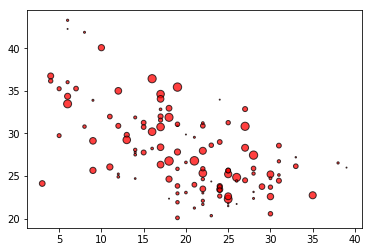

In [62]:
#bubble plot
plt.scatter(rides_city, avg_fare_city, marker="o", facecolors="red", edgecolors="black",
            s=drivers_city, alpha=0.75)

In [59]:
#total type rides
rides_type = merged_data.groupby('type').count()
rides_type = rides_type['ride_id']
rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [60]:
#avg fare type rides
total_fare_type = merged_data.groupby('type').sum()
total_fare_type = total_fare_type['fare']
total_fare_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [61]:
#total type drivers
drivers_type = city_data.groupby('type').sum()
drivers_type

driver_count
type                  
Rural               78
Suburban           490
Urban             2405

In [39]:
#driver type pie chart data
driver_labels = ['Rural', 'Suburban', 'Urban']
driver_colors = ['gold', 'lightskyblue', 'lightcoral']
driver_explode = (0, 0, 0.1)

Text(0.5,1,'% of Total Drivers by City Type')

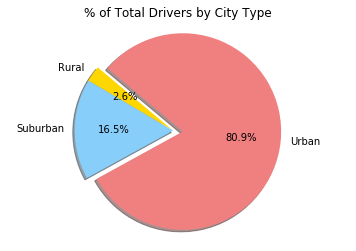

In [41]:
#driver type pie chart
plt.pie(drivers_type, explode=driver_explode, labels=driver_labels, colors=driver_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('% of Total Drivers by City Type')

In [46]:
#ride type pie chart data
ride_labels = ['Rural', 'Suburban', 'Urban']
ride_colors = ['gold', 'lightskyblue', 'lightcoral']
ride_explode = (0, 0, 0.1)

Text(0.5,1,'% of Total Rides by City Type')

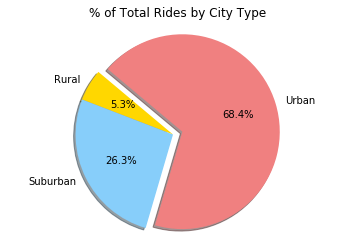

In [48]:
#ride type pie chart
plt.pie(rides_type, explode=ride_explode, labels=ride_labels, colors=ride_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('% of Total Rides by City Type')

In [51]:
#fare type pie chart data
fare_labels = ['Rural', 'Suburban', 'Urban']
fare_colors = ['gold', 'lightskyblue', 'lightcoral']
fare_explode = (0, 0, 0.1)

Text(0.5,1,'% of Total Fares by City Type')

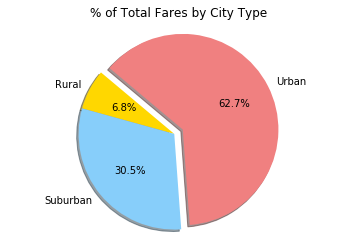

In [53]:
#ride type pie chart
plt.pie(total_fare_type, explode=fare_explode, labels=fare_labels, colors=fare_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('% of Total Fares by City Type')